In [1]:
# Install the kaggle API
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Make download of dogs-vs-cats archives
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:20<00:00, 43.9MB/s]
100% 812M/812M [00:20<00:00, 41.6MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

dogs-vs-cats.zip  sample_data		test1.zip
kaggle.json	  sampleSubmission.csv	train.zip


In [7]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

dogs-vs-cats.zip  sample_data		test1.zip  train.zip
kaggle.json	  sampleSubmission.csv	train


In [9]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [10]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.6094.jpg', 'cat.2560.jpg', 'cat.11077.jpg', 'dog.6348.jpg', 'cat.2642.jpg', 'dog.10768.jpg', 'dog.8637.jpg', 'cat.5038.jpg', 'cat.4283.jpg', 'cat.4580.jpg', 'cat.11890.jpg', 'dog.12327.jpg', 'dog.3713.jpg', 'cat.2229.jpg', 'cat.5729.jpg', 'dog.11324.jpg', 'cat.390.jpg', 'cat.6842.jpg', 'cat.5991.jpg', 'cat.10398.jpg', 'dog.10780.jpg', 'dog.4129.jpg', 'dog.10195.jpg', 'dog.2194.jpg', 'dog.6277.jpg', 'cat.5049.jpg', 'dog.400.jpg', 'dog.11708.jpg', 'dog.18.jpg', 'cat.11090.jpg', 'dog.177.jpg', 'cat.5749.jpg', 'cat.6868.jpg', 'cat.603.jpg', 'dog.203.jpg', 'dog.3843.jpg', 'dog.10699.jpg', 'cat.11243.jpg', 'dog.624.jpg', 'cat.12302.jpg', 'dog.9218.jpg', 'dog.12066.jpg', 'cat.2528.jpg', 'cat.10276.jpg', 'dog.5099.jpg', 'dog.1907.jpg', 'cat.8910.jpg', 'cat.7453.jpg', 'cat.4374.jpg', 'dog.11694.jpg', 'cat.2675.jpg', 'dog.4089.jpg', 'dog.4051.jpg', 'cat.7478.jpg', 'dog.6550.jpg', 'dog.8980.jpg', 'cat.2362.jpg', 'dog.10212.jpg', 'dog.3471.jpg', 'cat.381.jpg', 'dog.5090.jpg', 'cat.12143.jpg'

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

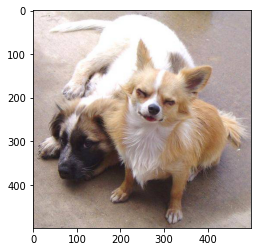

In [12]:
# Display dog image
img = mpimg.imread('/content/train/dog.9197.jpg')
imgplt = plt.imshow(img)
plt.show()

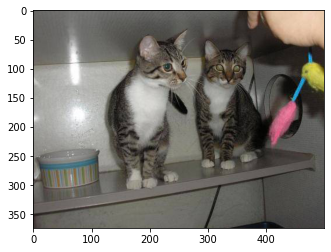

In [13]:
# Display cat image
img = mpimg.imread('/content/train/cat.2317.jpg')
imgplt = plt.imshow(img)
plt.show()

In [14]:
# Show the first five files on a train dir
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cat
cat
cat
dog
cat


In [15]:
# Count how many cats and dogs images have
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [16]:
# Creating a directory for resized images
os.mkdir('/content/image resized')

In [17]:
# Resize all images for 224x224
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [19]:
print(os.listdir('/content/image resized/'))

['cat.6094.jpg', 'cat.2560.jpg', 'cat.11077.jpg', 'dog.6348.jpg', 'cat.2642.jpg', 'dog.10768.jpg', 'dog.8637.jpg', 'cat.5038.jpg', 'cat.4283.jpg', 'cat.4580.jpg', 'cat.11890.jpg', 'dog.12327.jpg', 'dog.3713.jpg', 'cat.2229.jpg', 'cat.5729.jpg', 'dog.11324.jpg', 'cat.390.jpg', 'cat.6842.jpg', 'cat.5991.jpg', 'cat.10398.jpg', 'dog.10780.jpg', 'dog.4129.jpg', 'dog.10195.jpg', 'dog.2194.jpg', 'dog.6277.jpg', 'cat.5049.jpg', 'dog.400.jpg', 'dog.11708.jpg', 'dog.18.jpg', 'cat.11090.jpg', 'dog.177.jpg', 'cat.5749.jpg', 'cat.6868.jpg', 'cat.603.jpg', 'dog.203.jpg', 'dog.3843.jpg', 'dog.10699.jpg', 'cat.11243.jpg', 'dog.624.jpg', 'cat.12302.jpg', 'dog.9218.jpg', 'dog.12066.jpg', 'cat.2528.jpg', 'cat.10276.jpg', 'dog.5099.jpg', 'dog.1907.jpg', 'cat.8910.jpg', 'cat.7453.jpg', 'cat.4374.jpg', 'dog.11694.jpg', 'cat.2675.jpg', 'dog.4089.jpg', 'dog.4051.jpg', 'cat.7478.jpg', 'dog.6550.jpg', 'dog.8980.jpg', 'cat.2362.jpg', 'dog.10212.jpg', 'dog.3471.jpg', 'cat.381.jpg', 'dog.5090.jpg', 'cat.12143.jpg'

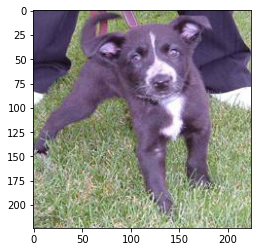

In [20]:
# Display resized dog image
img = mpimg.imread('/content/image resized/dog.11623.jpg')
imgplt = plt.imshow(img)
plt.show()

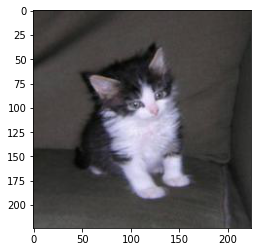

In [22]:
# Display resized cat image
img = mpimg.imread('/content/image resized/cat.9029.jpg')
imgplt = plt.imshow(img)
plt.show()

In [23]:
# Creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  # dog = 1
  if label == 'dog':
    labels.append(1)
  # cat = 0
  else:
    labels.append(0)

In [24]:
print(filenames[0:5])
print(len(filenames))

['cat.6094.jpg', 'cat.2560.jpg', 'cat.11077.jpg', 'dog.6348.jpg', 'cat.2642.jpg']
2000


In [25]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 0]
2000


In [26]:
# Counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1010  990]


In [27]:
import cv2
import glob

In [28]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [29]:
print(dog_cat_images)

[[[[170 201 186]
   [168 201 186]
   [169 202 187]
   ...
   [171 116  71]
   [184 127  82]
   [192 135  90]]

  [[170 201 186]
   [168 201 186]
   [167 203 187]
   ...
   [201 156 113]
   [213 165 123]
   [221 173 131]]

  [[167 200 185]
   [166 202 186]
   [167 203 187]
   ...
   [252 223 186]
   [255 234 199]
   [255 241 206]]

  ...

  [[ 13   6  13]
   [ 12   5  12]
   [ 13   7  12]
   ...
   [121  54 193]
   [121  55 191]
   [121  55 191]]

  [[ 13   6  13]
   [ 12   5  12]
   [ 12   6  11]
   ...
   [118  53 192]
   [119  55 191]
   [119  56 190]]

  [[ 13   6  13]
   [ 12   5  12]
   [ 12   6  11]
   ...
   [118  54 190]
   [119  55 191]
   [119  56 190]]]


 [[[174 149 159]
   [174 149 159]
   [175 150 160]
   ...
   [121 114 127]
   [ 97  93 105]
   [ 86  82  94]]

  [[177 152 162]
   [177 152 162]
   [178 153 163]
   ...
   [126 119 132]
   [ 96  92 104]
   [ 80  76  88]]

  [[180 155 165]
   [181 156 166]
   [182 157 167]
   ...
   [132 125 138]
   [101  97 109]
   [ 82  78

In [30]:
type(dog_cat_images)

numpy.ndarray

In [31]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [32]:
X = dog_cat_images
Y = np.asarray(labels)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [35]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [36]:
print(X_train_scaled)

[[[[0.64313725 0.69411765 0.68627451]
   [0.64705882 0.69803922 0.69019608]
   [0.65098039 0.70196078 0.69411765]
   ...
   [0.59607843 0.64705882 0.63921569]
   [0.6        0.65098039 0.64313725]
   [0.60392157 0.65490196 0.64705882]]

  [[0.64705882 0.69803922 0.69019608]
   [0.64705882 0.69803922 0.69019608]
   [0.65098039 0.70196078 0.69411765]
   ...
   [0.60784314 0.65882353 0.65098039]
   [0.61176471 0.6627451  0.65490196]
   [0.61176471 0.6627451  0.65490196]]

  [[0.65098039 0.70196078 0.69411765]
   [0.65098039 0.70196078 0.69411765]
   [0.65098039 0.70196078 0.69411765]
   ...
   [0.62352941 0.6745098  0.66666667]
   [0.62352941 0.6745098  0.66666667]
   [0.61960784 0.67058824 0.6627451 ]]

  ...

  [[0.55294118 0.64313725 0.70196078]
   [0.54509804 0.63529412 0.69411765]
   [0.5372549  0.62745098 0.68627451]
   ...
   [0.44313725 0.49411765 0.54901961]
   [0.34901961 0.4        0.45490196]
   [0.30980392 0.36078431 0.41568627]]

  [[0.56078431 0.65098039 0.70980392]
   [0.5

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

In [38]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [39]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [41]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 52s 950ms/step - loss: 0.2471 - acc: 0.8869
Epoch 2/5
50/50 [==============================] - 48s 966ms/step - loss: 0.0773 - acc: 0.9725
Epoch 3/5
50/50 [==============================] - 48s 952ms/step - loss: 0.0545 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 47s 948ms/step - loss: 0.0425 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 47s 948ms/step - loss: 0.0343 - acc: 0.9919


In [42]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 13s 922ms/step - loss: 0.0503 - acc: 0.9800
Test Loss = 0.05031759291887283
Test Accuracy = 0.9800000190734863


In [43]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [44]:
file_names = os.listdir('/content/test1/')
print(file_names)

['4648.jpg', '2192.jpg', '9789.jpg', '623.jpg', '1873.jpg', '6087.jpg', '9785.jpg', '5531.jpg', '10407.jpg', '3637.jpg', '8767.jpg', '9249.jpg', '8727.jpg', '6331.jpg', '11779.jpg', '1205.jpg', '9490.jpg', '2606.jpg', '6770.jpg', '9905.jpg', '2340.jpg', '7704.jpg', '7888.jpg', '7209.jpg', '5245.jpg', '3601.jpg', '12440.jpg', '11889.jpg', '3486.jpg', '2558.jpg', '99.jpg', '6088.jpg', '10593.jpg', '934.jpg', '6355.jpg', '6877.jpg', '11222.jpg', '7907.jpg', '9335.jpg', '10650.jpg', '4171.jpg', '7785.jpg', '10327.jpg', '971.jpg', '252.jpg', '10748.jpg', '5291.jpg', '4538.jpg', '9311.jpg', '6654.jpg', '5285.jpg', '2853.jpg', '6738.jpg', '4800.jpg', '6045.jpg', '1349.jpg', '2053.jpg', '661.jpg', '6488.jpg', '10072.jpg', '4282.jpg', '4210.jpg', '2458.jpg', '9854.jpg', '7882.jpg', '10649.jpg', '9101.jpg', '278.jpg', '8355.jpg', '10683.jpg', '6255.jpg', '275.jpg', '4761.jpg', '1824.jpg', '8329.jpg', '4851.jpg', '7430.jpg', '109.jpg', '2071.jpg', '9109.jpg', '6803.jpg', '4684.jpg', '5958.jpg', '

Path of the image to be predicted: /content/test1/1873.jpg


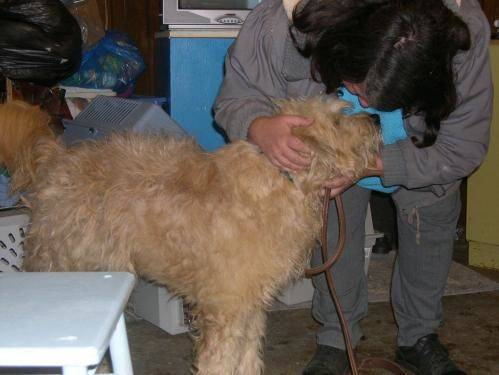

1/1 [==============================] - 1s 712ms/step
[[-0.35942996  0.6046626 ]]
1
The image represents a Dog


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')